In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from aermanager.aerparser import load_events_from_file

from aermanager.parsers import parse_dvs_ibm

In [13]:
user = "01"
# lighting = "natural"
# lighting = "fluorescent"
# lighting = "fluorescent_led"
# lighting = "lab"
lighting = "led"



In [14]:
labels_path = "DvsGesture/user" + user + "_" + lighting + "_labels.csv"
events_path = "DvsGesture/user" + user + "_" + lighting + ".aedat"

In [15]:
# loading labels

labels = pd.read_csv(labels_path)
labels

,class,startTime_usec,endTime_usec
0,1,48486443,53269496
1,2,54965479,61654131
2,3,62416370,67828271
3,4,70801005,78747352
4,5,79566760,86941427
5,6,89799825,98108236
6,7,98279740,104168041
7,8,104911224,112419283
8,8,112667011,118745871
9,9,119774895,126635051


In [16]:
# loading aedat file (events)

shape, events = load_events_from_file(events_path, parser = parse_dvs_ibm)

In [17]:
df_events = pd.DataFrame(data=events, columns={'x', 'y', 't', 'p'})
df_events = df_events[['x' ,'y', 't', 'p']]

In [18]:
del events

In [19]:
df_events

,x,y,t,p
0,56,77,48486443,False
1,49,65,48486449,True
2,51,86,48486467,False
3,38,101,48486468,False
4,89,71,48486472,False
...,...,...,...,...
7178407,24,84,143766355,True
7178408,31,38,143766363,True
7178409,59,98,143766368,True
7178410,60,43,143766373,False


In [20]:
type(df_events.iloc[0]['t'])

numpy.uint64

# Visualisation

In [21]:
# events_slice = df_events.iloc[0:100000]

In [22]:
# events_slice_np = events_slice.to_numpy()
# events_slice_np

In [23]:
# xyz = events_slice_np[:, :3]
# polarity = events_slice_np[:, 3]

In [24]:
# plt.figure(figsize=(4, 4), dpi=150)
# ax = plt.axes(projection='3d')
# ax.azim = 20
# ax.elev = 20
# ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c = polarity, s=0.01)

# Analysing frequency of events

In [25]:
import datetime

In [26]:
# datetime.datetime.fromtimestamp(53036041/1000000)

In [27]:
events_freq = df_events.copy()
events_freq['t'] = events_freq['t'].apply(lambda x: datetime.datetime.fromtimestamp(x/1000000))   # converting timestamps to datetime format                                                                    #convert timestamps to ts
events_freq['freq'] = 1                         # frequency of events
events_freq = events_freq.set_index('t')       # set ts as index
events_freq_res = events_freq['freq'].resample('ms').sum().to_frame()       # resample to find events per ms

In [29]:
events_freq_res

,freq
t,
1970-01-01 01:00:48.486,43
1970-01-01 01:00:48.487,82
1970-01-01 01:00:48.488,79
1970-01-01 01:00:48.489,102
1970-01-01 01:00:48.490,73
...,...
1970-01-01 01:02:23.762,124
1970-01-01 01:02:23.763,123
1970-01-01 01:02:23.764,131


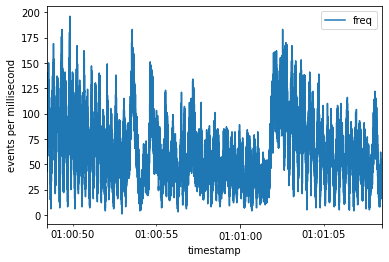

In [32]:
ax0 = events_freq_res.iloc[0:20000].plot(xlabel = 'timestamp', ylabel = 'events per millisecond')

Text(0.5, 1.0, 'histogram')

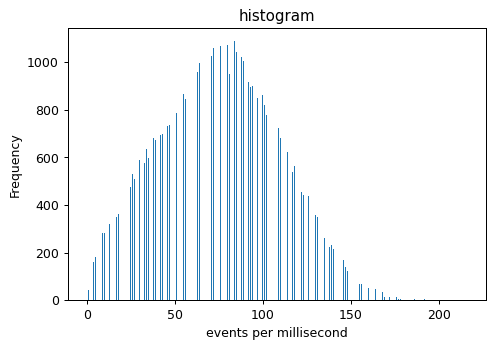

In [220]:
plt.figure(dpi=90)
ax1 = events_freq_res['freq'].plot.hist(bins=1000)
ax1.set_xlabel('events per millisecond')
ax1.set_title('histogram')

75.33938560678415

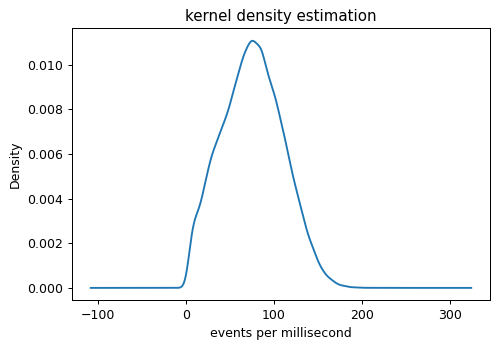

In [213]:
plt.figure(dpi=90)
ax2 = events_freq_res['freq'].plot.kde()
ax2.set_xlabel('events per millisecond')
ax2.set_title('kernel density estimation')
np.mean(events_freq_res['freq'])

In [214]:
print('Mean: ', np.mean(events_freq_res['freq']))
print('Median: ', np.median(events_freq_res['freq']))
print('Std deviation: ', np.std(events_freq_res['freq']))

Mean:  75.33938560678415
Median:  75.0
Std deviation:  34.509237346229796


In [ ]:
lab higher

histogram seems discretised
